## Dimensionality reduction

We will test some of the dimensionality reduction techniques on the [UFO dataset](https://drive.google.com/file/d/0B2gZvn36c5CmRTJpS3pkUllmX1U/view?usp=sharing) from the last week.




### PCA

Subset all **weather related** features from the data and run PCA over it. 


1. Extract the 2 best principal components (k=2). 
1. Plot the **feature** space into the new space. 
    - We should create a scatter plot with 1st component on the axis x and second component on y. 
    - The length of each component is equal to number of columns (features) we have in our data before PCA.
    - Points in the graph that are close to each other are similar features. We need to anotate the points with feature names.
1. Observe which features have similar meaning and which have opposite.
    - Features close to each other have similar meaning.
1. Select the optimal number of dimensions to keep - *k* (find the explained variance of each component and use the elbow rule)
1. Create a projection of your data into the *k* axes of the trained PCA
1. Export the data with the new features. Number of rows should be the same as in the original dataset.

In [505]:
import pandas as pd
import numpy as np

import matplotlib.cm as cm
import matplotlib.pyplot as plt
import seaborn as sns
import os

from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import datetime

In [512]:
data = pd.read_csv('UFO_for_PCA.csv', header = 0, sep = ',')

In [513]:
data.head()

,Unnamed: 0,shape,duration_seconds,lat,lng,cloudCover,humidity,precipIntensity,precipProbability,precipType,pressure,temperature,visibility,windBearing,windSpeed,ast_estimated_diameter,ast_miss_distance,ast_orbiting_body,ast_relative_velocity,month
0,0,cylinder,2700.0,29.883056,-97.941111,0.00,0.73,0.0,0.0,None,1009.05,25.86,16.09,154.0,4.89,0.297879,42621696.0,Earth,13778.372043,10
1,1,light,7200.0,29.384210,-98.581082,0.00,0.77,0.0,0.0,None,1008.81,26.12,16.09,135.0,6.60,0.297879,42621696.0,Earth,13778.372043,10
2,2,circle,20.0,53.200000,-2.916667,0.75,0.84,0.0,0.0,rain,1019.00,15.56,2.90,190.0,2.24,0.297879,42621696.0,Earth,13778.372043,10
3,3,circle,20.0,28.978333,-96.645833,0.12,0.71,0.0,0.0,rain,1020.64,22.68,16.09,136.0,2.75,0.297879,42621696.0,Earth,13778.372043,10
4,4,light,900.0,21.418056,-157.803611,0.63,0.77,0.0,0.0,rain,1015.33,25.74,16.09,80.0,3.60,0.297879,42621696.0,Earth,13778.372043,10


In [514]:
data = data.drop('Unnamed: 0', axis = 1)

In [515]:
data

,shape,duration_seconds,lat,lng,cloudCover,humidity,precipIntensity,precipProbability,precipType,pressure,temperature,visibility,windBearing,windSpeed,ast_estimated_diameter,ast_miss_distance,ast_orbiting_body,ast_relative_velocity,month
0,cylinder,2700.0,29.883056,-97.941111,0.00,0.730000,0.0,0.0,None,1009.050000,25.860000,16.09,154.0,4.89,0.297879,42621696.0,Earth,13778.372043,10
1,light,7200.0,29.384210,-98.581082,0.00,0.770000,0.0,0.0,None,1008.810000,26.120000,16.09,135.0,6.60,0.297879,42621696.0,Earth,13778.372043,10
2,circle,20.0,53.200000,-2.916667,0.75,0.840000,0.0,0.0,rain,1019.000000,15.560000,2.90,190.0,2.24,0.297879,42621696.0,Earth,13778.372043,10
3,circle,20.0,28.978333,-96.645833,0.12,0.710000,0.0,0.0,rain,1020.640000,22.680000,16.09,136.0,2.75,0.297879,42621696.0,Earth,13778.372043,10
4,light,900.0,21.418056,-157.803611,0.63,0.770000,0.0,0.0,rain,1015.330000,25.740000,16.09,80.0,3.60,0.297879,42621696.0,Earth,13778.372043,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78781,light,300.0,40.693611,-75.190556,0.00,0.660547,0.0,0.0,None,1016.819541,13.496951,16.09,190.0,2.24,0.056760,3610758.0,Earth,32868.357670,9
78782,fireball,300.0,47.483056,-122.215833,0.00,0.660547,0.0,0.0,None,1016.819541,13.496951,16.09,190.0,2.24,0.056760,3610758.0,Earth,32868.357670,9
78783,circle,10.0,38.232500,-122.635556,0.00,0.660547,0.0,0.0,None,1016.819541,13.496951,16.09,190.0,2.24,0.056760,3610758.0,Earth,32868.357670,9
78784,unknown,180.0,40.499167,-74.399444,0.00,0.660547,0.0,0.0,None,1016.819541,13.496951,16.09,190.0,2.24,0.056760,3610758.0,Earth,32868.357670,9


In [516]:
data.dtypes

shape                      object
duration_seconds          float64
lat                       float64
lng                       float64
cloudCover                float64
humidity                  float64
precipIntensity           float64
precipProbability         float64
precipType                 object
pressure                  float64
temperature               float64
visibility                float64
windBearing               float64
windSpeed                 float64
ast_estimated_diameter    float64
ast_miss_distance         float64
ast_orbiting_body          object
ast_relative_velocity     float64
month                       int64
dtype: object

In [517]:
data_PCA = data.drop(['shape','lat', 'lng', 'ast_estimated_diameter', 'ast_miss_distance', 'ast_relative_velocity', 'ast_orbiting_body', 'month'], axis = 1)
data_PCA

,duration_seconds,cloudCover,humidity,precipIntensity,precipProbability,precipType,pressure,temperature,visibility,windBearing,windSpeed
0,2700.0,0.00,0.730000,0.0,0.0,None,1009.050000,25.860000,16.09,154.0,4.89
1,7200.0,0.00,0.770000,0.0,0.0,None,1008.810000,26.120000,16.09,135.0,6.60
2,20.0,0.75,0.840000,0.0,0.0,rain,1019.000000,15.560000,2.90,190.0,2.24
3,20.0,0.12,0.710000,0.0,0.0,rain,1020.640000,22.680000,16.09,136.0,2.75
4,900.0,0.63,0.770000,0.0,0.0,rain,1015.330000,25.740000,16.09,80.0,3.60
...,...,...,...,...,...,...,...,...,...,...,...
78781,300.0,0.00,0.660547,0.0,0.0,None,1016.819541,13.496951,16.09,190.0,2.24
78782,300.0,0.00,0.660547,0.0,0.0,None,1016.819541,13.496951,16.09,190.0,2.24
78783,10.0,0.00,0.660547,0.0,0.0,None,1016.819541,13.496951,16.09,190.0,2.24
78784,180.0,0.00,0.660547,0.0,0.0,None,1016.819541,13.496951,16.09,190.0,2.24


In [518]:
data_dummies = pd.get_dummies(data_PCA, drop_first= True)

In [519]:
data_dummies

,duration_seconds,cloudCover,humidity,precipIntensity,precipProbability,pressure,temperature,visibility,windBearing,windSpeed,precipType_rain,precipType_snow
0,2700.0,0.00,0.730000,0.0,0.0,1009.050000,25.860000,16.09,154.0,4.89,0,0
1,7200.0,0.00,0.770000,0.0,0.0,1008.810000,26.120000,16.09,135.0,6.60,0,0
2,20.0,0.75,0.840000,0.0,0.0,1019.000000,15.560000,2.90,190.0,2.24,1,0
3,20.0,0.12,0.710000,0.0,0.0,1020.640000,22.680000,16.09,136.0,2.75,1,0
4,900.0,0.63,0.770000,0.0,0.0,1015.330000,25.740000,16.09,80.0,3.60,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
78781,300.0,0.00,0.660547,0.0,0.0,1016.819541,13.496951,16.09,190.0,2.24,0,0
78782,300.0,0.00,0.660547,0.0,0.0,1016.819541,13.496951,16.09,190.0,2.24,0,0
78783,10.0,0.00,0.660547,0.0,0.0,1016.819541,13.496951,16.09,190.0,2.24,0,0
78784,180.0,0.00,0.660547,0.0,0.0,1016.819541,13.496951,16.09,190.0,2.24,0,0


In [521]:
numerical = list(data_dummies.dtypes[data_dummies.dtypes != 'object'].index)
numerical.remove("duration_seconds")
len(numerical)

11

# PCA

In [522]:
reduced = data_dummies[numerical]
reduced = StandardScaler().fit_transform(reduced)
reduced.shape

(78786, 11)

In [524]:
pca = PCA(n_components=11)
pca.fit(reduced)
transformed = pca.fit_transform(reduced)

In [525]:
# judge by eigen value >1
pca.explained_variance_

array([2.56165151, 1.64522767, 1.2421611 , 1.1291355 , 0.93526483,
       0.88340942, 0.66346634, 0.58653099, 0.55566412, 0.46153452,
       0.33609363])

In [526]:
# should choose 34 
sum(pca.explained_variance_>1)

4

In [527]:
pca.explained_variance_[pca.explained_variance_>1]

array([2.56165151, 1.64522767, 1.2421611 , 1.1291355 ])

In [528]:
pca.explained_variance_ratio_

array([0.23287445, 0.14956425, 0.1129223 , 0.10264738, 0.085023  ,
       0.08030893, 0.06031436, 0.05332032, 0.05051428, 0.04195715,
       0.03055358])

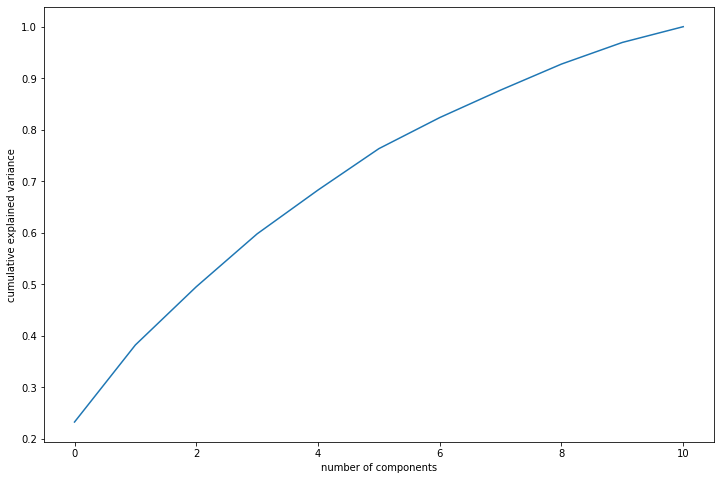

In [529]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.cumsum(pca.explained_variance_ratio_))
ax.set_xlabel('number of components')
ax.set_ylabel('cumulative explained variance');

In [530]:
np.cumsum(pca.explained_variance_ratio_)

array([0.23287445, 0.38243871, 0.49536101, 0.59800839, 0.68303139,
       0.76334031, 0.82365467, 0.87697499, 0.92748927, 0.96944642,
       1.        ])

# PCA k = 2

In [531]:
pca = PCA(n_components=2)
pca.fit(reduced)
transformed = pca.fit_transform(reduced)

In [532]:
print(pca.components_)

[[ 0.41818021  0.30820175  0.35488682  0.46698285 -0.14534249 -0.01428657
  -0.4003782  -0.05774589  0.11918604  0.42481803  0.08048503]
 [ 0.01941034  0.39251305 -0.10640515 -0.09596704  0.51896149 -0.57170413
  -0.1680991  -0.14030888 -0.26763546 -0.11247368  0.31086237]]


In [533]:
print(pca.explained_variance_)

[2.56165151 1.64522767]


In [534]:
pca.explained_variance_ratio_

array([0.23287445, 0.14956425])

In [535]:
transformed

array([[-0.38637388, -1.60055402],
       [-0.17455077, -1.80210004],
       [ 3.64569322,  1.11285783],
       ...,
       [-0.8813229 ,  0.04448867],
       [-0.8813229 ,  0.04448867],
       [-0.8813229 ,  0.04448867]])

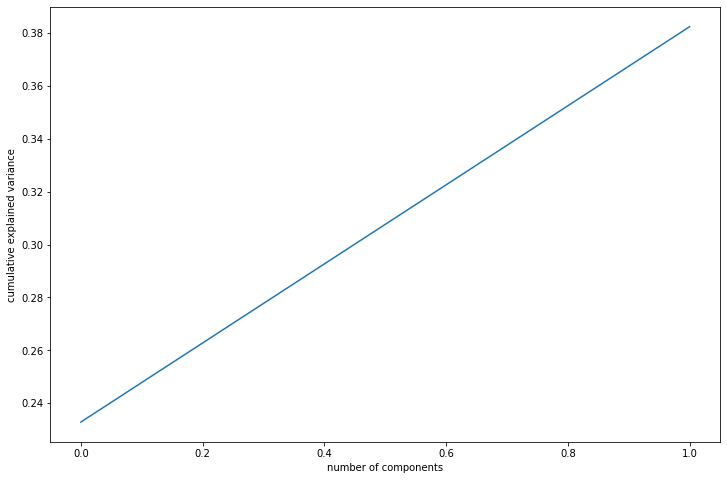

In [536]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.cumsum(pca.explained_variance_ratio_))
ax.set_xlabel('number of components')
ax.set_ylabel('cumulative explained variance');

In [537]:
pca.components_

array([[ 0.41818021,  0.30820175,  0.35488682,  0.46698285, -0.14534249,
        -0.01428657, -0.4003782 , -0.05774589,  0.11918604,  0.42481803,
         0.08048503],
       [ 0.01941034,  0.39251305, -0.10640515, -0.09596704,  0.51896149,
        -0.57170413, -0.1680991 , -0.14030888, -0.26763546, -0.11247368,
         0.31086237]])

In [538]:
pca.explained_variance_

array([2.56165151, 1.64522767])

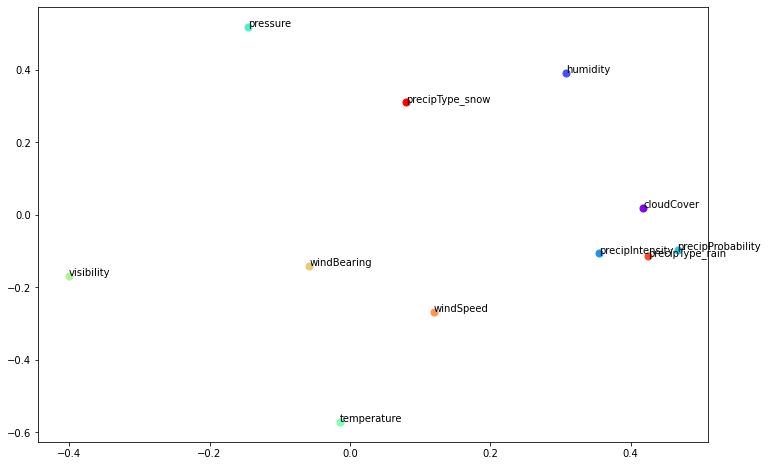

In [539]:
fig, ax = plt.subplots(figsize=(12,8))
colors = cm.rainbow(np.linspace(0, 1, len(numerical)))

for i in range(len(numerical)):
    ax.scatter(pca.components_[0][i],pca.components_[1][i], color = colors[i], label = numerical[i], s = 50)
    
for i, txt in enumerate(numerical):
    ax.annotate(txt, (pca.components_[0][i], pca.components_[1][i]))
    
#leg = ax.legend(loc=2, ncol=2, numpoints=1, fontsize=10, shadow=True)

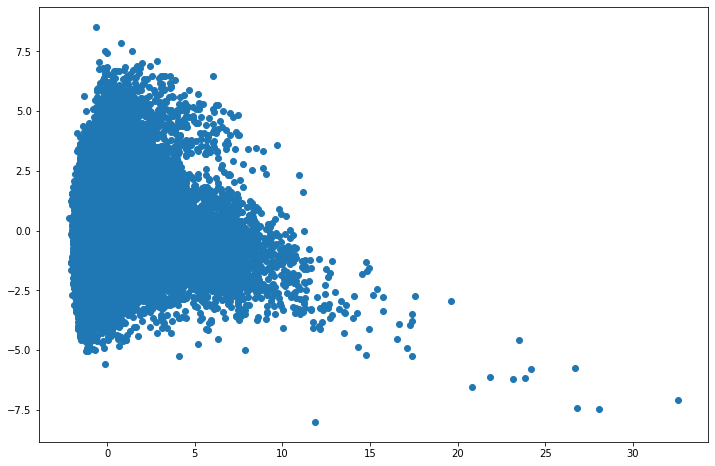

In [540]:
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(transformed[:,0],transformed[:,1])

# Exporting reduced data

In [543]:
pca = PCA(n_components=4)
pca.fit(reduced)
transformed = pca.fit_transform(reduced)

In [544]:
print(pca.explained_variance_)

[2.56165151 1.64522767 1.2421611  1.1291355 ]


In [545]:
pca.explained_variance_ratio_

array([0.23287445, 0.14956425, 0.1129223 , 0.10264738])

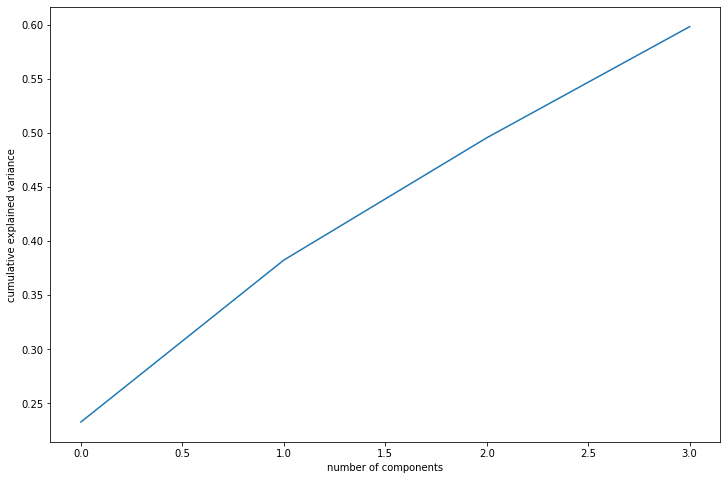

In [546]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.cumsum(pca.explained_variance_ratio_))
ax.set_xlabel('number of components')
ax.set_ylabel('cumulative explained variance');

In [547]:
np.cumsum(pca.explained_variance_ratio_)

array([0.23287445, 0.38243871, 0.49536101, 0.59800839])

In [548]:
transformed.shape

(78786, 4)

In [550]:
PCA = pd.DataFrame(transformed)
PCA.columns = ['PC1','PC2', 'PC3','PC4']

In [561]:
len(PCA)

78786

In [554]:
df_PCA = PCA
df_PCA['duration_seconds'] = data['duration_seconds'] 
df_PCA

,PC1,PC2,PC3,PC4,duration_seconds
0,-0.386374,-1.600554,-0.157397,-0.462842,2700.0
1,-0.174551,-1.802100,-0.646125,-0.487443,7200.0
2,3.645693,1.112858,0.007116,-2.893792,20.0
3,0.493706,-0.417945,0.980050,-0.548708,20.0
4,1.483583,-0.934297,0.497367,-1.366090,900.0
...,...,...,...,...,...
78781,-0.881323,0.044489,0.405969,0.208595,300.0
78782,-0.881323,0.044489,0.405969,0.208595,300.0
78783,-0.881323,0.044489,0.405969,0.208595,10.0
78784,-0.881323,0.044489,0.405969,0.208595,180.0


Text(0.5, 1.0, 'PC1 vs PC4')

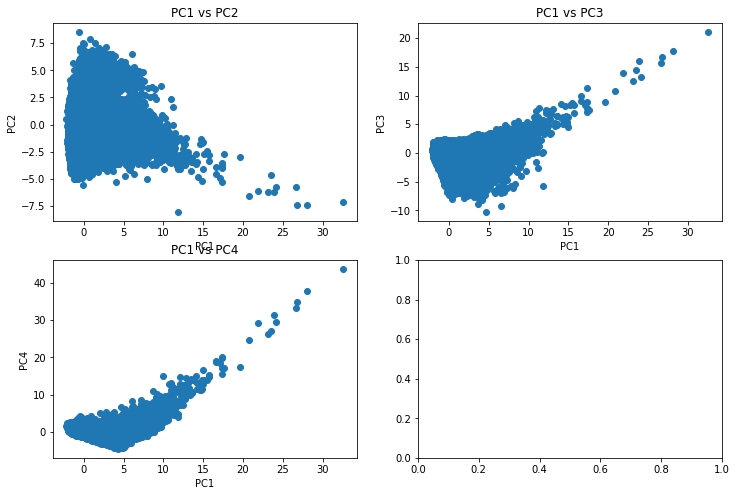

In [565]:
fig, ax = plt.subplots(2,2,figsize=(12,8))
ax[0][0].scatter(df_PCA['PC1'],df_PCA['PC2'])
ax[0][0].set_xlabel('PC1')
ax[0][0].set_ylabel('PC2')
ax[0][0].set_title('PC1 vs PC2')

ax[0][1].scatter(df_PCA['PC1'],df_PCA['PC3'])
ax[0][1].set_xlabel('PC1')
ax[0][1].set_ylabel('PC3')
ax[0][1].set_title('PC1 vs PC3')

ax[1][0].scatter(df_PCA['PC1'],df_PCA['PC4'])
ax[1][0].set_xlabel('PC1')
ax[1][0].set_ylabel('PC4')
ax[1][0].set_title('PC1 vs PC4')

In [566]:
df_PCA.to_csv('UFO_PCA.csv')